/work/a06/ykojima/GFM_data/data/merged_by_day_regionalized/2022-08-30.tif
/work/a06/ykojima/GFM_data/data/merged_by_day_regionalized/2022-09-11.tif
/work/a06/ykojima/GFM_data/data/merged_by_day_regionalized/2022-09-23.tif
/work/a06/ykojima/GFM_data/data/merged_by_day_regionalized/2022-10-05.tif
/work/a06/ykojima/GFM_data/data/merged_by_day_regionalized/2022-10-17.tif
/work/a06/ykojima/GFM_data/data/merged_by_day_regionalized/2022-10-29.tif
/work/a06/ykojima/GFM_data/data/merged_by_day_regionalized/2022-11-10.tif
/work/a06/ykojima/GFM_data/data/merged_by_day_regionalized/2022-11-22.tif
/work/a06/ykojima/GFM_data/data/merged_by_day_regionalized/2022-12-04.tif
/work/a06/ykojima/GFM_data/data/merged_by_day_regionalized/2022-12-16.tif
/work/a06/ykojima/GFM_data/data/merged_by_day_regionalized/2022-12-28.tif
/work/a06/ykojima/GFM_data/data/merged_by_day_regionalized/2023-01-09.tif
/work/a06/ykojima/GFM_data/data/merged_by_day_regionalized/2023-01-21.tif


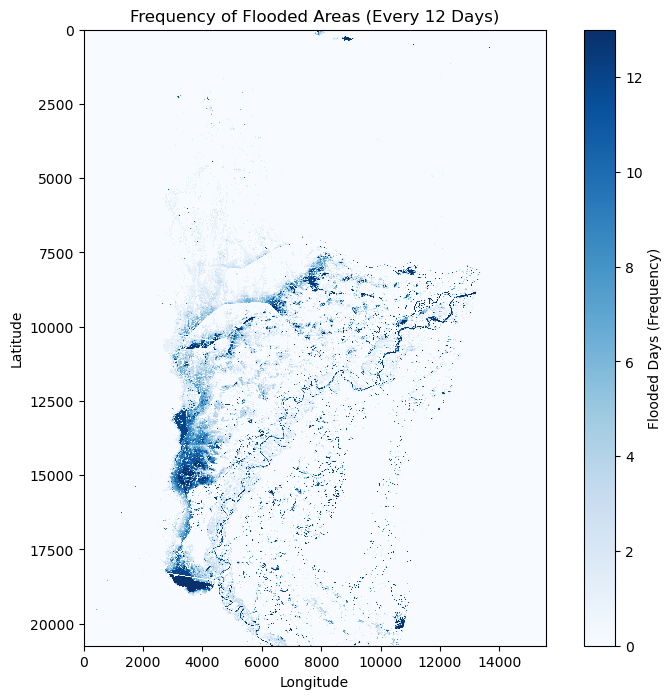

In [ ]:
import rasterio
import numpy as np
import matplotlib.pyplot as plt
from rasterio.warp import reproject, Resampling
import datetime

# データのディレクトリパス
directory_path = "/work/a06/ykojima/GFM_data/data/merged_by_day_regionalized"

# 2022-08-30から2023-01-21まで12日おきの日付リストを生成
start_date = datetime.datetime(2022, 8, 30)
end_date = datetime.datetime(2023, 5, 21)
file_dates = []
current_date = start_date

while current_date <= end_date:
    file_dates.append(current_date)
    current_date += datetime.timedelta(days=12)

# 対応するファイルパスをリスト化
file_paths = [f"{directory_path}/{date.strftime('%Y-%m-%d')}.tif" for date in file_dates]

# 初期化：最初のファイルの形状で積算データを用意
with rasterio.open(file_paths[0]) as src:
    accumulation = np.zeros((src.height, src.width), dtype=np.int32)
    profile = src.profile

# 各ファイルを読み込み、リプロジェクションして積算
for file_path in file_paths:
    print(file_path)
    try:
        with rasterio.open(file_path) as src:
            # リプロジェクション用の空配列を用意
            reprojected_data = np.zeros((profile['height'], profile['width']), dtype=np.uint8)
            
            # データをリプロジェクションして基準に合わせる
            reproject(
                source=rasterio.band(src, 1),
                destination=reprojected_data,
                src_transform=src.transform,
                src_crs=src.crs,
                dst_transform=profile['transform'],
                dst_crs=profile['crs'],
                resampling=Resampling.nearest
            )
            
            # 浸水エリア(1)かつデータが有効 (255ではない) のみ積算
            valid_data = (reprojected_data != 255) & (reprojected_data == 1)
            accumulation += valid_data.astype(np.int32)
    except FileNotFoundError:
        print(f"File {file_path} not found, skipping.")
        continue

# 結果をプロット
plt.figure(figsize=(10, 8))
plt.imshow(accumulation, cmap='Blues', interpolation='nearest')
plt.colorbar(label="Flooded Days (Frequency)")
plt.title("Frequency of Flooded Areas (Every 12 Days)")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()


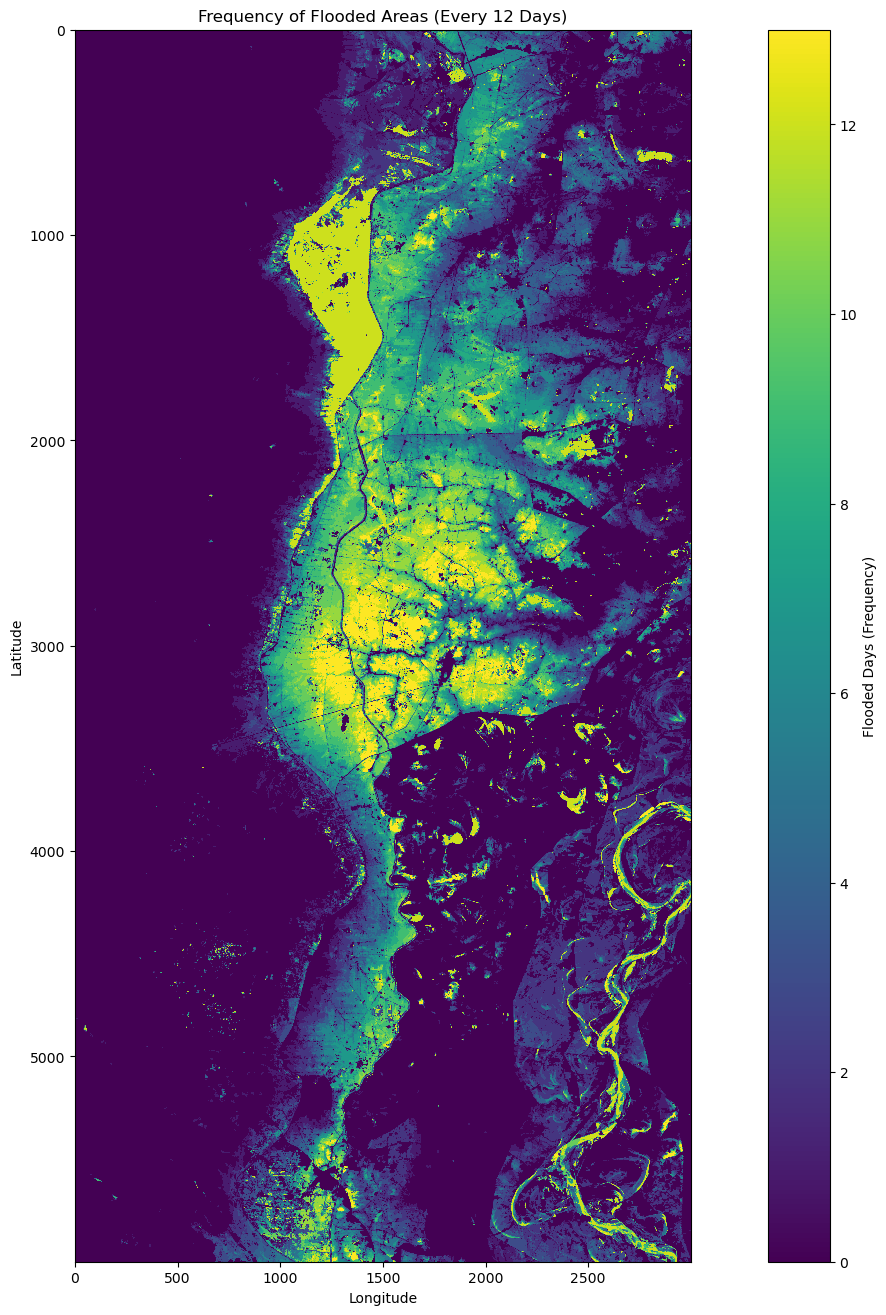

In [7]:
# 結果をプロット
plt.figure(figsize=(20, 16))
plt.imshow(accumulation[12000:18000, 2000:5000], cmap='viridis', interpolation='nearest')
plt.colorbar(label="Flooded Days (Frequency)")
plt.title("Frequency of Flooded Areas (Every 12 Days)")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()
